# BigMart sales data analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading data

In [343]:
test_data = pd.read_csv('/Volumes/Work2/work/python/projects/Bigmart sales prediction/bigmart-sales-data/Test.csv')
train_data = pd.read_csv('/Volumes/Work2/work/python/projects/Bigmart sales prediction/bigmart-sales-data/Train.csv')

In [344]:
full_data = pd.concat([train_data,test_data])

In [345]:
print(test_data.shape, train_data.shape, full_data.shape)

(5681, 11) (8523, 12) (14204, 12)


In [346]:
full_data.info()  # Item_Outlet_Sales is the value to be predicted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


### Checking for missing values

In [347]:
full_data.isnull().sum()          # 'Item_Weight' and 'Outlet_Size' has some missing values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [348]:
full_data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [349]:
# Item visibility: has zero minimum value which doesn't make any sense 
# Outlet Establishment year: are from 1985-2009 and will make more sense if we convert this to how 
# old a particular outlet is.

In [350]:
full_data['Store_Age']  = full_data['Outlet_Establishment_Year'] -1985

In [351]:
# looking at data
full_data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Store_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,24
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,13
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,2


### Lets look at the unique categorical values

In [352]:
full_data.apply(lambda x: len(x.unique()) )

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
Store_Age                        9
dtype: int64

## Visualizing frequency of categories of the nominal features

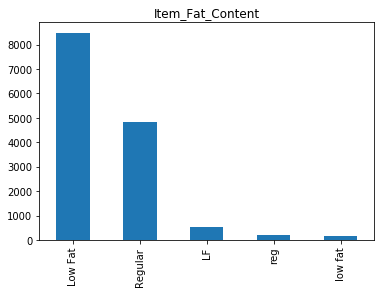

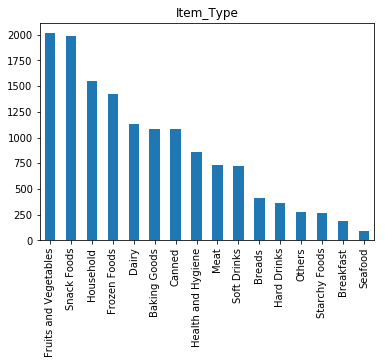

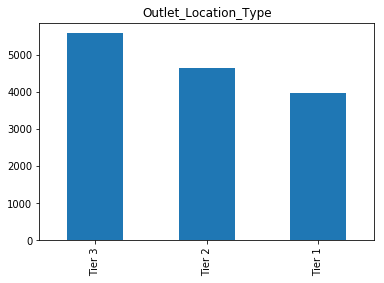

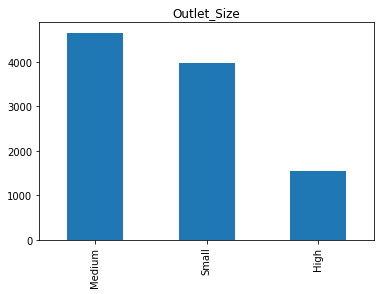

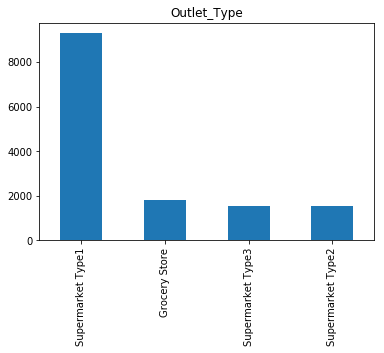

In [353]:
#Filter categorical variables
categorical_columns = [x for x in full_data.dtypes.index if full_data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    full_data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.figure()

### Obeservations

In [354]:
# Item_Fat_Content: Some of 'Low Fat' values are wrongly labeled as 'low fat' and 'LF'. 
#                    and some of 'Regular' are mentioned as 'reg'.
print('Correcting the errors in Item Fat Comtent')

Correcting the errors in Item Fat Comtent


In [355]:
full_data.Item_Fat_Content = full_data.Item_Fat_Content.replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
print('After Correction\n')
print(full_data.Item_Fat_Content.value_counts())

After Correction

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


## Data munging(filling the missing values)

### 1. Item Weight

In [356]:
full_data.Item_Weight.isnull().sum()

2439

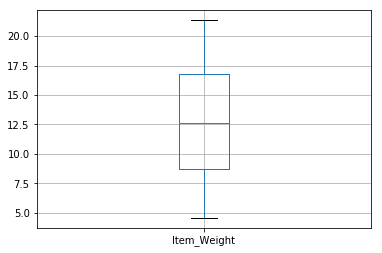

In [357]:
full_data.boxplot('Item_Weight')

In [358]:
full_data.groupby('Item_Fat_Content').Item_Weight.mean()  # no useful information

Item_Fat_Content
Low Fat    12.906608
Regular    12.584743
Name: Item_Weight, dtype: float64

In [359]:
full_data.groupby('Item_Type').Item_Weight.mean()  # a little information, it can be used to fill the missing values

Item_Type
Baking Goods             12.275211
Breads                   11.152362
Breakfast                13.179112
Canned                   12.340830
Dairy                    13.238358
Frozen Foods             12.569323
Fruits and Vegetables    13.194406
Hard Drinks              11.576205
Health and Hygiene       13.171739
Household                13.337977
Meat                     12.766104
Others                   13.915724
Seafood                  12.760274
Snack Foods              12.865732
Soft Drinks              11.788408
Starchy Foods            13.659758
Name: Item_Weight, dtype: float64

In [360]:
weight_per_item = full_data.groupby('Item_Type').Item_Weight.transform('mean')
full_data.Item_Weight.fillna(weight_per_item, inplace=True)

In [361]:
full_data.Item_Weight.isnull().sum()

0

### 2. Outlet Size

In [362]:
full_data.Outlet_Size.isnull().sum()

4016

In [363]:
full_data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [364]:
pd.crosstab(full_data.Outlet_Location_Type, full_data.Outlet_Size)

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,1550,2430
Tier 2,0,0,1550
Tier 3,1553,3105,0


In [365]:
pd.crosstab(full_data.Outlet_Type,full_data.Outlet_Size)

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,880
Supermarket Type1,1553,1550,3100
Supermarket Type2,0,1546,0
Supermarket Type3,0,1559,0


In [366]:
# Outlet Type gives a lot of information and it acn be used to fill the missing values

In [367]:
store_size = full_data.groupby('Outlet_Type').Outlet_Size.apply(lambda x: x.mode())

In [368]:
store_size      # filling missing values using the below mentioned criteria

Outlet_Type         
Grocery Store      0     Small
Supermarket Type1  0     Small
Supermarket Type2  0    Medium
Supermarket Type3  0    Medium
Name: Outlet_Size, dtype: object

In [369]:
full_data.loc[((full_data.Outlet_Type=='Grocery Store') & (full_data.Outlet_Size.isnull())), 'Outlet_Size' ] = 'Small'
full_data.loc[((full_data.Outlet_Type=='Supermarket Type1') & (full_data.Outlet_Size.isnull())), 'Outlet_Size' ] = 'Small'
full_data.loc[((full_data.Outlet_Type=='Supermarket Type2') & (full_data.Outlet_Size.isnull())), 'Outlet_Size' ] = 'Medium'
full_data.loc[((full_data.Outlet_Type=='Supermarket Type3') & (full_data.Outlet_Size.isnull())), 'Outlet_Size' ] = 'Medium'

In [370]:
full_data.Outlet_Size.isnull().sum()

0

In [371]:
full_data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

## Feature Engineering 

In [372]:
# we have seen above some of the features have zero visibility. we have to elevate that

In [373]:
full_data.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

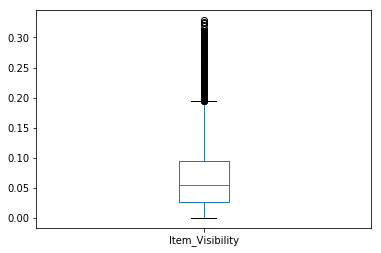

In [374]:
full_data.Item_Visibility.plot(kind='box')

In [375]:
visibility_value = full_data.groupby('Item_Identifier').Item_Visibility.transform('mean')

In [376]:
bool_zero = (full_data.Item_Visibility == 0)

In [377]:
full_data.loc[bool_zero,'Item_Visibility'] = np.nan

In [378]:
full_data.Item_Visibility.fillna(visibility_value, inplace=True)

In [379]:
(full_data.Item_Visibility==0).sum()

0

### Created a new feature

In [380]:
full_data.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [381]:
## If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. 
## If you see the categories, these look like being Food, Drinks and Non-Consumables. We can make a new feature having 
## a broad category. 

In [382]:
full_data['Broad_Category'] = full_data.Item_Identifier.apply(lambda x: x[:2])

In [383]:
full_data.Broad_Category = full_data.Broad_Category.map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [384]:
full_data.Broad_Category.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Broad_Category, dtype: int64

### Converting categorical value to numerical values

In [385]:
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()

In [386]:
full_data['Outlet'] = l_e.fit_transform(full_data.Outlet_Identifier)

In [387]:
full_data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Store_Age                      int64
Broad_Category                object
Outlet                         int64
dtype: object

In [388]:
full_data.keys()

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Store_Age',
       'Broad_Category', 'Outlet'],
      dtype='object')

In [389]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
         'Outlet_Location_Type', 'Outlet_Type', 'Broad_Category']
for i in col:
    full_data[i] = l_e.fit_transform(full_data[i])

In [390]:
full_data.dtypes   # For 'Oulet_Identifier' and 'Item_Identifier' will be used for submitting solution

Item_Fat_Content               int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                      int64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type           int64
Outlet_Size                    int64
Outlet_Type                    int64
Store_Age                      int64
Broad_Category                 int64
Outlet                         int64
dtype: object

In [391]:
#One Hot Coding:
#data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
#                              'Broad_Category','Outlet'])

### Dividing into test and train

In [392]:
train_cleaned, test_cleaned = full_data.iloc[:8523], full_data.iloc[8523:]
test_cleaned = test_cleaned.drop(['Item_Outlet_Sales'], axis=1)
#'Item_Outlet_Sales' is droped from the test data as it is the value to be predeicted from the model

#Export files as modified versions:
train_cleaned.to_csv('/Volumes/Work2/work/python/projects/Bigmart sales prediction/bigmart-sales-data/train_modified.csv',index=False)
test_cleaned.to_csv('/Volumes/Work2/work/python/projects/Bigmart sales prediction/bigmart-sales-data/test_modified.csv',index=False)

In [393]:
print(test_cleaned.shape, train_cleaned.shape)  # cross checking with the shape of actual data

(5681, 14) (8523, 15)


## Developing Model

In [422]:
# Selecting features for building model
selected_cols = ['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility',
                 'Item_Weight', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                 'Store_Age', 'Broad_Category', 'Outlet']

# selecting cols used for ID during submission
Id_cols=['Item_Identifier','Outlet_Identifier']

target = ['Item_Outlet_Sales']

In [423]:
X_train, X_test, y = train_cleaned[selected_cols], test_cleaned[selected_cols], train_cleaned[target]

In [396]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,train_test_split 
from sklearn.preprocessing import StandardScaler

In [424]:
t_X, val_X, t_y, val_y = train_test_split(X_train, y, test_size=0.25)

## 1. Linear Regression

In [425]:
lr_clf = LinearRegression(normalize=True)
model_fit = lr_clf.fit(t_X,t_y)
y_pred = model_fit.predict(val_X)

In [426]:
mean_squared_error(val_y,y_pred)**(1/2)

1216.3379321770733

In [400]:
submission = test_cleaned[Id_cols]
submission['Item_Outlet_Sales'] = np.nan

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
submission.loc[:,target] = model_fit.predict(X_test)

In [ ]:
# Mean squre on test is: 1274

## 2. Ridge Regression model 

In [414]:
from sklearn.linear_model import Ridge
rr_clf = Ridge(alpha=0.01)
model_rr = rr_clf.fit(t_X, t_y)
y_pred = model_rr.predict(val_X)
mean_squared_error(val_y,y_pred)**(1/2)

1197.7573330593673

In [ ]:
submission.loc[:,target] = model_rr.predict(X_test)
# Mean squre on test is: 1273

## 3. Decision Tree

In [440]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor(min_samples_leaf=100)
model_dt = dt_clf.fit(t_X, t_y)
y_pred = model_dt.predict(val_X)
mean_squared_error(val_y,y_pred)**(1/2)

1099.8313926627313

In [416]:
model_dt.feature_importances_

array([ 0.00738937,  0.45285611,  0.04352962,  0.11258954,  0.0629938 ,
        0.00713308,  0.00527767,  0.25225675,  0.03835021,  0.01762384])

In [433]:
# selecting features according to feature importances
#predictors = ['Item_MRP', 'Item_Type', 'Item_Visibility',
#                 'Item_Weight', 'Outlet_Type', 'Store_Age']
predictors = ['Item_Fat_Content', 'Item_Type', 'Item_Visibility',
                 'Item_Weight', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                 'Store_Age', 'Broad_Category', 'Outlet']
model_dt = dt_clf.fit(t_X, t_y)
y_pred = model_dt.predict(val_X)
mean_squared_error(val_y,y_pred)**(1/2)

1152.9675748107834

In [ ]:
submission.loc[:,target] = model_dt.predict(X_test)
# Mean squre on test is: 1197

## 4. Ramdom Forest

In [460]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(min_samples_leaf=100, n_estimators=150, max_depth=10)
model_rf = rf_clf.fit(t_X, t_y)
y_pred = model_rf.predict(val_X)
mean_squared_error(val_y,y_pred)**(1/2)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1097.2657427790095

In [457]:
model_rf = rf_clf.fit(X_train, y)
submission.loc[:,target] = model_rf.predict(X_test)
# soluSvm_df = pd.DataFrame({'Loan_ID': XTest.index, 'Loan_Status' : yPred_rf} )
submission.to_csv('Solution_mart.csv', index=False)

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/Users/user/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [461]:
# Mean squre on test is: 1152

In [462]:
# Analysis: Random forest works bests for predicting the BigMart sales for a perticular Item at a perticular Outlet